In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/master_cgm_clean_no_faults.csv'
df = pd.read_csv(file_path)

print("Shape:", df.shape)
df.head()


Shape: (26160194, 10)


,timestamp,id,glucose,dataset,delta_glucose,roll_mean,roll_std,hour,dayofweek,label
0,2015-05-22 10:35:00,2,149.0,aleppo,NaN,149.000000,0.000000,10,4,normal
1,2015-05-22 10:40:00,2,143.0,aleppo,-6.0,146.000000,4.242641,10,4,normal
2,2015-05-22 10:45:00,2,151.0,aleppo,8.0,147.666667,4.163332,10,4,normal
3,2015-05-22 10:50:00,2,149.0,aleppo,-2.0,148.000000,3.464102,10,4,normal
4,2015-05-22 10:55:00,2,140.0,aleppo,-9.0,146.400000,4.669047,10,4,normal


In [ ]:
!rm -rf /content/chunk_outputs
os.makedirs('/content/chunk_outputs', exist_ok=True)


In [ ]:

# PART 1: CHUNKED READ + SYNTHETIC SENSOR FAULTS


import pandas as pd, numpy as np, os, random
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

file_path = '/content/drive/MyDrive/master_cgm_clean_no_faults.csv'   # upload this file first
out_dir   = '/content/chunk_outputs'
os.makedirs(out_dir, exist_ok=True)

chunk_size = 100_000
iso_params = dict(n_estimators=100, contamination=0.05, random_state=42)

chunk_no = 0
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    print(f"\nProcessing chunk {chunk_no} ...")


    chunk['timestamp'] = pd.to_datetime(chunk['timestamp'])

    # ---- Inject sensor faults ----
    chunk['sensor_fault'] = 0
    n_faults = int(0.03 * len(chunk))  # ~3% faults
    fault_idx = np.random.choice(chunk.index, size=n_faults, replace=False)
    for i in fault_idx:
        f_type = random.choice(['spike','dropout','drift'])
        if f_type == 'spike':
            chunk.loc[i,'glucose'] *= np.random.uniform(1.5, 3.0)
        elif f_type == 'dropout':
            chunk.loc[i,'glucose'] = np.nan
        elif f_type == 'drift':
            drift = np.random.uniform(-0.5, 0.5)
            chunk.loc[i,'glucose'] += drift * chunk.loc[i,'glucose']
        chunk.loc[i,'sensor_fault'] = 1
    chunk['glucose'] = chunk['glucose'].fillna(method='ffill')

    # ---- Isolation Forest ----
    num_cols = chunk.select_dtypes(include='number').columns
    X_scaled = StandardScaler().fit_transform(chunk[num_cols])
    iso = IsolationForest(**iso_params)
    preds = iso.fit_predict(X_scaled)
    chunk['anomaly_flag'] = (preds == -1).astype(int)

    out_path = f'{out_dir}/chunk_{chunk_no}_flags.csv'
    chunk.to_csv(out_path, index=False)
    print(f"Saved {out_path}")
    chunk_no += 1



Processing chunk 0 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_0_flags.csv

Processing chunk 1 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_1_flags.csv

Processing chunk 2 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_2_flags.csv

Processing chunk 3 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_3_flags.csv

Processing chunk 4 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_4_flags.csv

Processing chunk 5 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_5_flags.csv

Processing chunk 6 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_6_flags.csv

Processing chunk 7 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_7_flags.csv

Processing chunk 8 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_8_flags.csv

Processing chunk 9 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_9_flags.csv

Processing chunk 10 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_10_flags.csv

Processing chunk 11 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_11_flags.csv

Processing chunk 12 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_12_flags.csv

Processing chunk 13 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_13_flags.csv

Processing chunk 14 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_14_flags.csv

Processing chunk 15 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_15_flags.csv

Processing chunk 16 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_16_flags.csv

Processing chunk 17 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_17_flags.csv

Processing chunk 18 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_18_flags.csv

Processing chunk 19 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_19_flags.csv

Processing chunk 20 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_20_flags.csv

Processing chunk 21 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_21_flags.csv

Processing chunk 22 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_22_flags.csv

Processing chunk 23 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_23_flags.csv

Processing chunk 24 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_24_flags.csv

Processing chunk 25 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_25_flags.csv

Processing chunk 26 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_26_flags.csv

Processing chunk 27 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_27_flags.csv

Processing chunk 28 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_28_flags.csv

Processing chunk 29 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_29_flags.csv

Processing chunk 30 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_30_flags.csv

Processing chunk 31 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_31_flags.csv

Processing chunk 32 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_32_flags.csv

Processing chunk 33 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_33_flags.csv

Processing chunk 34 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_34_flags.csv

Processing chunk 35 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_35_flags.csv

Processing chunk 36 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_36_flags.csv

Processing chunk 37 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_37_flags.csv

Processing chunk 38 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_38_flags.csv

Processing chunk 39 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_39_flags.csv

Processing chunk 40 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_40_flags.csv

Processing chunk 41 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_41_flags.csv

Processing chunk 42 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_42_flags.csv

Processing chunk 43 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_43_flags.csv

Processing chunk 44 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_44_flags.csv

Processing chunk 45 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_45_flags.csv

Processing chunk 46 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_46_flags.csv

Processing chunk 47 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_47_flags.csv

Processing chunk 48 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_48_flags.csv

Processing chunk 49 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_49_flags.csv

Processing chunk 50 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_50_flags.csv

Processing chunk 51 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_51_flags.csv

Processing chunk 52 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_52_flags.csv

Processing chunk 53 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_53_flags.csv

Processing chunk 54 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_54_flags.csv

Processing chunk 55 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_55_flags.csv

Processing chunk 56 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_56_flags.csv

Processing chunk 57 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_57_flags.csv

Processing chunk 58 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_58_flags.csv

Processing chunk 59 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_59_flags.csv

Processing chunk 60 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_60_flags.csv

Processing chunk 61 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_61_flags.csv

Processing chunk 62 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_62_flags.csv

Processing chunk 63 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_63_flags.csv

Processing chunk 64 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_64_flags.csv

Processing chunk 65 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_65_flags.csv

Processing chunk 66 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_66_flags.csv

Processing chunk 67 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_67_flags.csv

Processing chunk 68 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_68_flags.csv

Processing chunk 69 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_69_flags.csv

Processing chunk 70 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_70_flags.csv

Processing chunk 71 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_71_flags.csv

Processing chunk 72 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_72_flags.csv

Processing chunk 73 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_73_flags.csv

Processing chunk 74 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_74_flags.csv

Processing chunk 75 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_75_flags.csv

Processing chunk 76 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_76_flags.csv

Processing chunk 77 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_77_flags.csv

Processing chunk 78 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_78_flags.csv

Processing chunk 79 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_79_flags.csv

Processing chunk 80 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_80_flags.csv

Processing chunk 81 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_81_flags.csv

Processing chunk 82 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_82_flags.csv

Processing chunk 83 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_83_flags.csv

Processing chunk 84 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_84_flags.csv

Processing chunk 85 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_85_flags.csv

Processing chunk 86 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_86_flags.csv

Processing chunk 87 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_87_flags.csv

Processing chunk 88 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_88_flags.csv

Processing chunk 89 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_89_flags.csv

Processing chunk 90 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_90_flags.csv

Processing chunk 91 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_91_flags.csv

Processing chunk 92 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_92_flags.csv

Processing chunk 93 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_93_flags.csv

Processing chunk 94 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_94_flags.csv

Processing chunk 95 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_95_flags.csv

Processing chunk 96 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_96_flags.csv

Processing chunk 97 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_97_flags.csv

Processing chunk 98 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_98_flags.csv

Processing chunk 99 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_99_flags.csv

Processing chunk 100 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_100_flags.csv

Processing chunk 101 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_101_flags.csv

Processing chunk 102 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_102_flags.csv

Processing chunk 103 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_103_flags.csv

Processing chunk 104 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_104_flags.csv

Processing chunk 105 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_105_flags.csv

Processing chunk 106 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_106_flags.csv

Processing chunk 107 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_107_flags.csv

Processing chunk 108 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_108_flags.csv

Processing chunk 109 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_109_flags.csv

Processing chunk 110 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_110_flags.csv

Processing chunk 111 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_111_flags.csv

Processing chunk 112 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_112_flags.csv

Processing chunk 113 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_113_flags.csv

Processing chunk 114 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_114_flags.csv

Processing chunk 115 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_115_flags.csv

Processing chunk 116 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_116_flags.csv

Processing chunk 117 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_117_flags.csv

Processing chunk 118 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_118_flags.csv

Processing chunk 119 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_119_flags.csv

Processing chunk 120 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_120_flags.csv

Processing chunk 121 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_121_flags.csv

Processing chunk 122 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_122_flags.csv

Processing chunk 123 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_123_flags.csv

Processing chunk 124 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_124_flags.csv

Processing chunk 125 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_125_flags.csv

Processing chunk 126 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_126_flags.csv

Processing chunk 127 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_127_flags.csv

Processing chunk 128 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_128_flags.csv

Processing chunk 129 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_129_flags.csv

Processing chunk 130 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_130_flags.csv

Processing chunk 131 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_131_flags.csv

Processing chunk 132 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_132_flags.csv

Processing chunk 133 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_133_flags.csv

Processing chunk 134 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_134_flags.csv

Processing chunk 135 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_135_flags.csv

Processing chunk 136 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_136_flags.csv

Processing chunk 137 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_137_flags.csv

Processing chunk 138 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_138_flags.csv

Processing chunk 139 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_139_flags.csv

Processing chunk 140 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_140_flags.csv

Processing chunk 141 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_141_flags.csv

Processing chunk 142 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_142_flags.csv

Processing chunk 143 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_143_flags.csv

Processing chunk 144 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_144_flags.csv

Processing chunk 145 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_145_flags.csv

Processing chunk 146 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_146_flags.csv

Processing chunk 147 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_147_flags.csv

Processing chunk 148 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_148_flags.csv

Processing chunk 149 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_149_flags.csv

Processing chunk 150 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_150_flags.csv

Processing chunk 151 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_151_flags.csv

Processing chunk 152 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_152_flags.csv

Processing chunk 153 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_153_flags.csv

Processing chunk 154 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_154_flags.csv

Processing chunk 155 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_155_flags.csv

Processing chunk 156 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_156_flags.csv

Processing chunk 157 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_157_flags.csv

Processing chunk 158 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_158_flags.csv

Processing chunk 159 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_159_flags.csv

Processing chunk 160 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_160_flags.csv

Processing chunk 161 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_161_flags.csv

Processing chunk 162 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_162_flags.csv

Processing chunk 163 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_163_flags.csv

Processing chunk 164 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_164_flags.csv

Processing chunk 165 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_165_flags.csv

Processing chunk 166 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_166_flags.csv

Processing chunk 167 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_167_flags.csv

Processing chunk 168 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_168_flags.csv

Processing chunk 169 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_169_flags.csv

Processing chunk 170 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_170_flags.csv

Processing chunk 171 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_171_flags.csv

Processing chunk 172 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_172_flags.csv

Processing chunk 173 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_173_flags.csv

Processing chunk 174 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_174_flags.csv

Processing chunk 175 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_175_flags.csv

Processing chunk 176 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_176_flags.csv

Processing chunk 177 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_177_flags.csv

Processing chunk 178 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_178_flags.csv

Processing chunk 179 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_179_flags.csv

Processing chunk 180 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_180_flags.csv

Processing chunk 181 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_181_flags.csv

Processing chunk 182 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_182_flags.csv

Processing chunk 183 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_183_flags.csv

Processing chunk 184 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_184_flags.csv

Processing chunk 185 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_185_flags.csv

Processing chunk 186 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_186_flags.csv

Processing chunk 187 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_187_flags.csv

Processing chunk 188 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_188_flags.csv

Processing chunk 189 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_189_flags.csv

Processing chunk 190 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_190_flags.csv

Processing chunk 191 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_191_flags.csv

Processing chunk 192 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_192_flags.csv

Processing chunk 193 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_193_flags.csv

Processing chunk 194 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_194_flags.csv

Processing chunk 195 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_195_flags.csv

Processing chunk 196 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_196_flags.csv

Processing chunk 197 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_197_flags.csv

Processing chunk 198 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_198_flags.csv

Processing chunk 199 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_199_flags.csv

Processing chunk 200 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_200_flags.csv

Processing chunk 201 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_201_flags.csv

Processing chunk 202 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_202_flags.csv

Processing chunk 203 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_203_flags.csv

Processing chunk 204 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_204_flags.csv

Processing chunk 205 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_205_flags.csv

Processing chunk 206 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_206_flags.csv

Processing chunk 207 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_207_flags.csv

Processing chunk 208 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_208_flags.csv

Processing chunk 209 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_209_flags.csv

Processing chunk 210 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_210_flags.csv

Processing chunk 211 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_211_flags.csv

Processing chunk 212 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_212_flags.csv

Processing chunk 213 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_213_flags.csv

Processing chunk 214 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_214_flags.csv

Processing chunk 215 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_215_flags.csv

Processing chunk 216 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_216_flags.csv

Processing chunk 217 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_217_flags.csv

Processing chunk 218 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_218_flags.csv

Processing chunk 219 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_219_flags.csv

Processing chunk 220 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_220_flags.csv

Processing chunk 221 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_221_flags.csv

Processing chunk 222 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_222_flags.csv

Processing chunk 223 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_223_flags.csv

Processing chunk 224 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_224_flags.csv

Processing chunk 225 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_225_flags.csv

Processing chunk 226 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_226_flags.csv

Processing chunk 227 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_227_flags.csv

Processing chunk 228 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_228_flags.csv

Processing chunk 229 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_229_flags.csv

Processing chunk 230 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_230_flags.csv

Processing chunk 231 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_231_flags.csv

Processing chunk 232 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_232_flags.csv

Processing chunk 233 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_233_flags.csv

Processing chunk 234 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_234_flags.csv

Processing chunk 235 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_235_flags.csv

Processing chunk 236 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_236_flags.csv

Processing chunk 237 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_237_flags.csv

Processing chunk 238 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_238_flags.csv

Processing chunk 239 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_239_flags.csv

Processing chunk 240 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_240_flags.csv

Processing chunk 241 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_241_flags.csv

Processing chunk 242 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_242_flags.csv

Processing chunk 243 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_243_flags.csv

Processing chunk 244 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_244_flags.csv

Processing chunk 245 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_245_flags.csv

Processing chunk 246 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_246_flags.csv

Processing chunk 247 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_247_flags.csv

Processing chunk 248 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_248_flags.csv

Processing chunk 249 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_249_flags.csv

Processing chunk 250 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_250_flags.csv

Processing chunk 251 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_251_flags.csv

Processing chunk 252 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_252_flags.csv

Processing chunk 253 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_253_flags.csv

Processing chunk 254 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_254_flags.csv

Processing chunk 255 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_255_flags.csv

Processing chunk 256 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_256_flags.csv

Processing chunk 257 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_257_flags.csv

Processing chunk 258 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_258_flags.csv

Processing chunk 259 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_259_flags.csv

Processing chunk 260 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_260_flags.csv

Processing chunk 261 ...


/tmp/ipython-input-3447999659.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chunk['glucose'] = chunk['glucose'].fillna(method='ffill')


Saved /content/chunk_outputs/chunk_261_flags.csv


In [ ]:

# PART 2: MERGE ANOMALIES + CLASSIFY (SENSOR FAULT vs EMERGENCY)


import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


out_dir = '/content/chunk_outputs'


out_dir = '/content/chunk_outputs'


files = sorted(glob.glob(f"{out_dir}/chunk_*_flags.csv"))
anom_chunks = [pd.read_csv(f) for f in files]
df_all = pd.concat(anom_chunks, ignore_index=True)


df_anom = df_all[df_all['anomaly_flag'] == 1].copy()
print("Total anomalies:", len(df_anom))

-
def classify_anomaly(row):
    if row['sensor_fault'] == 1:
        return 'sensor_fault'
    elif row['glucose'] > 180 or row['glucose'] < 70:
        return 'emergency'
    else:
        return np.nan

df_anom['anomaly_type'] = df_anom.apply(classify_anomaly, axis=1)
df_anom = df_anom.dropna(subset=['anomaly_type'])

-
le = LabelEncoder()
y = le.fit_transform(df_anom['anomaly_type'])  # 0 = emergency, 1 = sensor_fault

---
df_anom['timestamp'] = pd.to_datetime(df_anom['timestamp'])
df_anom['time_sin'] = np.sin(2 * np.pi * df_anom['hour'] / 24)
df_anom['time_cos'] = np.cos(2 * np.pi * df_anom['hour'] / 24)


leak_cols = [
    'sensor_fault',
    'glucose',
    'dataset',
    'anomaly_flag',
    'anomaly_type',
    'timestamp',
]
X = df_anom.drop(columns=[c for c in leak_cols if c in df_anom.columns], errors='ignore')


X = X.select_dtypes(include=[np.number])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)


rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


print("\n=== Random Forest Classification Report (Leakage-Free) ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Total anomalies: 1307990

=== Random Forest Classification Report (Leakage-Free) ===
              precision    recall  f1-score   support

   emergency       0.86      0.94      0.90    149656
sensor_fault       0.95      0.87      0.91    186415

    accuracy                           0.90    336071
   macro avg       0.90      0.91      0.90    336071
weighted avg       0.91      0.90      0.90    336071

Confusion Matrix:
 [[140761   8895]
 [ 23435 162980]]


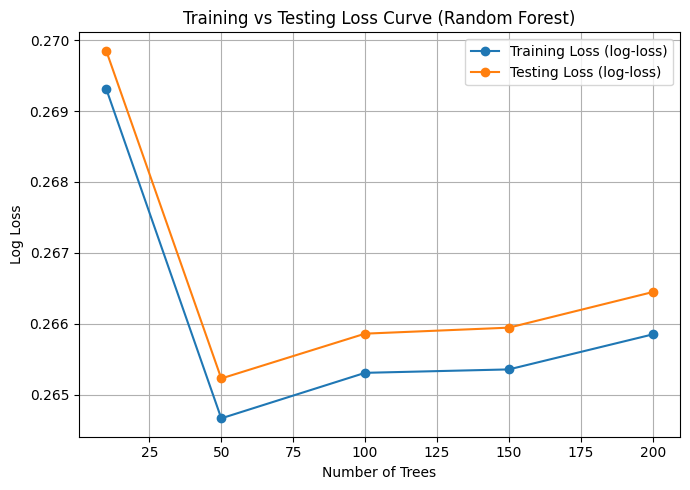

In [ ]:

# PART 3: TRAINING vs TESTING LOSS CURVE (Random Forest)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, accuracy_score


n_trees = [10, 50, 100, 150, 200]

train_errors, test_errors = [], []

for n in n_trees:
    rf_temp = RandomForestClassifier(
        n_estimators=n,
        max_depth=8,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
    rf_temp.fit(X_train, y_train)


    train_pred_proba = rf_temp.predict_proba(X_train)
    test_pred_proba = rf_temp.predict_proba(X_test)


    train_loss = log_loss(y_train, train_pred_proba)
    test_loss = log_loss(y_test, test_pred_proba)

    train_errors.append(train_loss)
    test_errors.append(test_loss)

plt.figure(figsize=(7,5))
plt.plot(n_trees, train_errors, marker='o', label='Training Loss (log-loss)')
plt.plot(n_trees, test_errors, marker='o', label='Testing Loss (log-loss)')
plt.title("Training vs Testing Loss Curve (Random Forest)")
plt.xlabel("Number of Trees")
plt.ylabel("Log Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
